In [1]:
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



In [2]:
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 hours 54 minutes 
    H2O cluster timezone:       America/New_York 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.36.0.3 
    H2O cluster version age:    12 days  
    H2O cluster name:           H2O_started_from_R_laksh_wbn696 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.90 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 3.6.1 (2019-07-05) 



In [3]:
data <- h2o.importFile("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip") 

  |======================================================================| 100%


In [7]:
parts <- h2o.splitFrame(data, c(0.8,0.1), see = 69)

In [8]:
train <- parts[[1]]

In [9]:
valid <- parts[[2]]

In [10]:
test <- parts[[3]]

In [11]:
y <- "IsArrDelayed"

In [12]:
xAll <- setdiff(colnames(data), 
                c("ArrDelay", "DepDelay",
                  "CarrierDelay", "WeatherDelay",
                  "NASDelay", "SecurityDelay",
                  "IsDepDelayed", "IsArrDelayed",
                  "ActualElapsedTime"))

In [13]:
system.time(
  m_def<-h2o.deeplearning(xAll, y, train,
                 validation_frame = valid)
)

  |======================================================================| 100%


   user  system elapsed 
   1.24    0.08  212.62 

In [14]:
h2o.performance(m_def, valid = TRUE)

H2OBinomialMetrics: deeplearning
** Reported on validation data. **
** Metrics reported on full validation frame **

MSE:  0.09504747
RMSE:  0.3082977
LogLoss:  0.2993853
Mean Per-Class Error:  0.1457704
AUC:  0.9452064
AUCPR:  0.9578588
Gini:  0.8904128

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
         NO  YES    Error       Rate
NO     1543  390 0.201759  =390/1933
YES     210 2129 0.089782  =210/2339
Totals 1753 2519 0.140449  =600/4272

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold       value idx
1                       max f1  0.348965    0.876492 242
2                       max f2  0.082413    0.915499 345
3                 max f0point5  0.661877    0.905922 133
4                 max accuracy  0.492320    0.865637 189
5                max precision  0.999972    1.000000   0
6                   max recall  0.011476    1.000000 387
7              max specificity  0.999972    1.00000

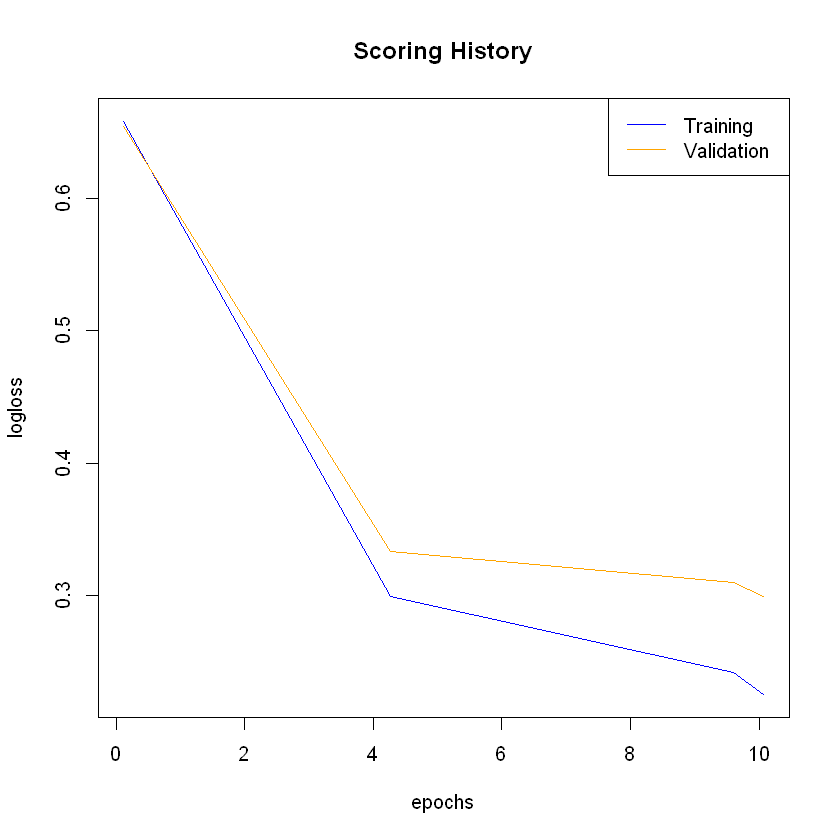

In [15]:
plot(m_def)

In [17]:
system.time(
  m_200_epochs<-h2o.deeplearning(xAll, y, train,
                 validation_frame = valid,
                  epochs = 200,
                  stopping_rounds =5,
                  stopping_tolerance = 0,
                  stopping_metric = "logloss")
)

  |======================================================================| 100%


   user  system elapsed 
   7.26    0.66 3348.72 

In [18]:
h2o.performance(m_200_epochs, valid = TRUE)

H2OBinomialMetrics: deeplearning
** Reported on validation data. **
** Metrics reported on full validation frame **

MSE:  0.09378728
RMSE:  0.3062471
LogLoss:  0.2902133
Mean Per-Class Error:  0.1365074
AUC:  0.9470697
AUCPR:  0.9588434
Gini:  0.8941394

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
         NO  YES    Error       Rate
NO     1616  317 0.163994  =317/1933
YES     255 2084 0.109021  =255/2339
Totals 1871 2401 0.133895  =572/4272

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold       value idx
1                       max f1  0.403955    0.879325 213
2                       max f2  0.206414    0.920881 291
3                 max f0point5  0.690326    0.901393 123
4                 max accuracy  0.407959    0.866105 212
5                max precision  0.999965    1.000000   0
6                   max recall  0.039041    1.000000 369
7              max specificity  0.999965    1.00000

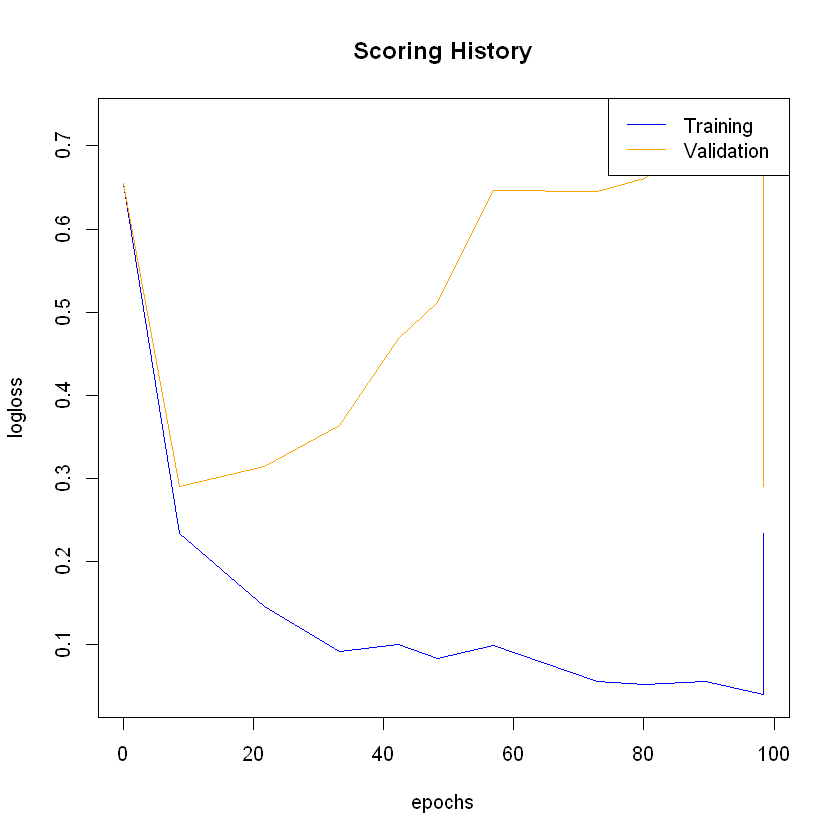

In [19]:
plot(m_200_epochs)

In [21]:
h2o.scoreHistory(m_200_epochs)

timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
2022-03-01 03:33:59,0.000 sec,NA,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01 03:34:04,33.609 sec,835 obs/sec,0.120295,1,4241,0.4840328,0.65488762,0.04959215,0.6912100,0.7580462,1.788742,0.39354710,0.4830878,0.6542962,0.05799659,0.6854775,0.7440441,1.826422,0.42275281
2022-03-01 03:38:52,5 min 35.307 sec,1154 obs/sec,8.643426,71,304724,0.2710612,0.23369625,0.70194595,0.9672790,0.9760871,1.788742,0.10396335,0.3062471,0.2902133,0.62143160,0.9470697,0.9588434,1.826422,0.13389513
2022-03-01 03:46:03,12 min 41.078 sec,1168 obs/sec,21.635257,178,762751,0.2141162,0.14634441,0.81402296,0.9892969,0.9919739,1.788742,0.05596495,0.2967622,0.3145914,0.64451805,0.9588584,0.9675040,1.826422,0.10931648
2022-03-01 03:52:16,18 min 45.230 sec,1187 obs/sec,33.304354,274,1174145,0.1661420,0.09152773,0.88802541,0.9951258,0.9962958,1.788742,0.03604860,0.2923495,0.3642063,0.65501122,0.9553639,0.9629944,1.826422,0.11001873
2022-03-01 03:57:01,23 min 19.457 sec,1197 obs/sec,42.291051,348,1490971,0.1789403,0.10019758,0.87010969,0.9962978,0.9971541,1.788742,0.03395738,0.3106921,0.4686291,0.61036253,0.9524401,0.9574256,1.826422,0.11352996
2022-03-01 04:00:01,26 min 31.101 sec,1207 obs/sec,48.219855,397,1699991,0.1595414,0.08312587,0.89674587,0.9971944,0.9978485,1.788742,0.02559251,0.3062116,0.5120478,0.62151923,0.9504716,0.9595808,1.823485,0.11048689
2022-03-01 04:04:56,31 min 51.361 sec,1199 obs/sec,56.954701,469,2007938,0.1728149,0.09911113,0.87885022,0.9961422,0.9970843,1.788742,0.03365863,0.3144873,0.6463727,0.60078510,0.9434991,0.9562238,1.826422,0.11095506
2022-03-01 04:14:00,40 min 27.676 sec,1186 obs/sec,72.824507,600,2567428,0.1309894,0.05637288,0.93039624,0.9984808,0.9988185,1.788742,0.01832304,0.3014114,0.6450632,0.63329248,0.9457973,0.9473044,1.820524,0.10182584
2022-03-01 04:18:27,44 min 59.018 sec,1175 obs/sec,80.112126,660,2824353,0.1265325,0.05203944,0.93505223,0.9987741,0.9990539,1.788742,0.01702848,0.3007375,0.6604577,0.63493058,0.9461393,0.9472239,1.820784,0.09995318


In [20]:
m_200x200x200 <- h2o.deeplearning(xAll, y, train, 
                                 validation_frame = valid,
                                 epochs =200,
                                 hidden = c(200,200,200))

  |======================================================================| 100%


In [22]:
h2o.performance(m_200x200x200, valid = TRUE)

H2OBinomialMetrics: deeplearning
** Reported on validation data. **
** Metrics reported on full validation frame **

MSE:  0.111937
RMSE:  0.3345699
LogLoss:  0.3538605
Mean Per-Class Error:  0.1533909
AUC:  0.9303971
AUCPR:  0.9460673
Gini:  0.8607943

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
         NO  YES    Error       Rate
NO     1578  355 0.183652  =355/1933
YES     288 2051 0.123130  =288/2339
Totals 1866 2406 0.150515  =643/4272

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold       value idx
1                       max f1  0.575699    0.864489 180
2                       max f2  0.236425    0.906912 305
3                 max f0point5  0.822364    0.886689  90
4                 max accuracy  0.704805    0.850890 132
5                max precision  0.999343    0.997704   1
6                   max recall  0.002552    1.000000 395
7              max specificity  0.999969    0.998965 

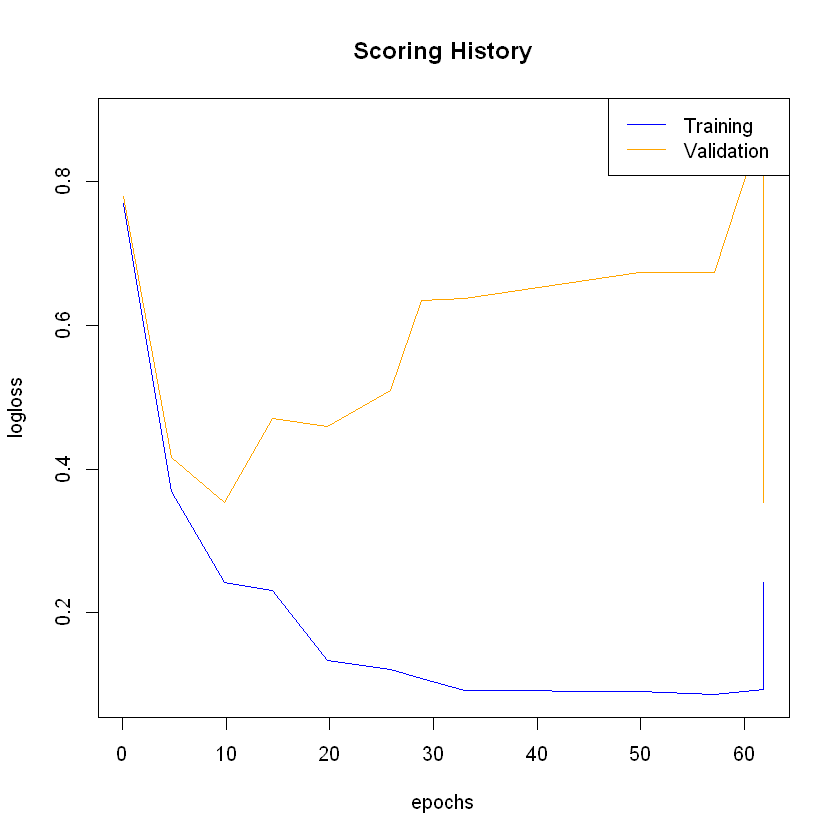

In [23]:
plot(m_200x200x200)

In [24]:
h2o.scoreHistory(m_200x200x200)

timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
2022-03-01 04:29:48,0.000 sec,NA,0.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01 04:29:54,25.964 sec,735 obs/sec,0.114310,1,4030,0.5315621,0.76963694,-0.1445265,0.6601023,0.7292631,1.798961,0.38446215,0.5351626,0.7795812,-0.1560373,0.6751640,0.7336182,1.826422,0.3897472
2022-03-01 04:33:22,3 min 56.198 sec,851 obs/sec,4.667508,40,164553,0.3490458,0.36926666,0.5065051,0.9256029,0.9427838,1.798961,0.15627490,0.3715220,0.4162559,0.4428534,0.9008308,0.9233799,1.826422,0.1896067
2022-03-01 04:37:07,7 min 39.426 sec,875 obs/sec,9.834038,84,346699,0.2792242,0.24166519,0.6841914,0.9687702,0.9764424,1.798961,0.09960159,0.3345699,0.3538605,0.5481710,0.9303971,0.9460673,1.826422,0.1505150
2022-03-01 04:40:31,11 min 5.710 sec,876 obs/sec,14.409162,123,507995,0.2735222,0.23035558,0.6969579,0.9814368,0.9856605,1.798961,0.07798805,0.3508886,0.4698366,0.5030200,0.9356670,0.9498506,1.826422,0.1402154
2022-03-01 04:44:17,14 min 51.734 sec,891 obs/sec,19.793419,169,697817,0.2040341,0.13391592,0.8313744,0.9899468,0.9922399,1.798961,0.05278884,0.3253389,0.4584670,0.5727596,0.9374173,0.9494973,1.826422,0.1331929
2022-03-01 04:48:06,18 min 45.979 sec,922 obs/sec,25.874004,221,912188,0.1945939,0.12096325,0.8466173,0.9922959,0.9941436,1.798961,0.04890438,0.3275108,0.5097751,0.5670361,0.9358070,0.9447642,1.826422,0.1282772
2022-03-01 07:39:22,3:09:54.577,90 obs/sec,28.803007,246,1015450,0.1842653,0.10864351,0.8624676,0.9929816,0.9944700,1.798961,0.04511952,0.3270659,0.6344604,0.5682115,0.9294107,0.9259651,1.826422,0.1331929
2022-03-01 07:42:47,3:14:14.324,101 obs/sec,33.012566,282,1163858,0.1678970,0.09158059,0.8858164,0.9948523,0.9958679,1.798961,0.04003984,0.3295919,0.6369306,0.5615163,0.9311625,0.9326235,1.823408,0.1303839
2022-03-01 07:55:21,3:26:05.127,145 obs/sec,49.850858,426,1757492,0.1683367,0.09029520,0.8852175,0.9955711,0.9964792,1.798961,0.03605578,0.3305723,0.6734727,0.5589038,0.9269623,0.9267950,1.823372,0.1315543


In [ ]:
m_200x200x200 <- h2o.deeplearning(xAll, y, train, 
                                 validation_frame = valid,
                                 epochs =200,
                                 hidden = c(400,400))

  |=======                                                               |  11%